<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
<small>
<br>October 5, 2017: second draft
<br>October 3, 2017: first draft
</small>
</div>
</p>
<br>
<p>
<div align="center">
<b>Abstract</b><br>
This presentation is a summary of the work I've done during the second year
<br>of my PhD course in Computer Science, XXXI cycle @ UniFI
</div>
</p>

In [1]:
from IPython.display import Markdown, Image, Latex

from collections import defaultdict

from muk.core import *
from muk.ext import *

from sympy import IndexedBase, symbols, latex, init_printing, Eq, Matrix
init_printing()


toc = ["", "exams & courses & conferences", "what I've done", "what I'm working on"]#, "thesis arguments"]
toc_iter = iter(toc[1:])

def reference_to_this_talk():
    src = '<a href="{href}">{href}</a>'
    return Markdown(src.format(href=r'http://massimo-nocentini.github.io/PhD/second-year-summary/talk.html'))

def table_of_contents():
    src = r'# TOC'
    return Markdown('\n- '.join(toc))

def greetings(smiley=True):
    return Markdown("<h1>{greet} {smile}</h1>".format(
        greet="Thanks for coming ", smile=":)" if smiley else ""))

def next_topic():
    return Markdown("# {topic}".format(topic=next(toc_iter)))

In [2]:
__AUTHOR__ = ("Massimo Nocentini", 
              "massimo.nocentini@unifi.it", 
              "https://github.com/massimo-nocentini/")

__SUPERVISOR__ = ("Donatella Merlini ", 
                  "donatella.merlini@unifi.it")

__ACKNOWLEDGEMENT__ = ["Giovanni Marchetti", "Marco Maggesi", "Antonio Bernini",]

reference_to_this_talk()

<a href="http://massimo-nocentini.github.io/PhD/second-year-summary/talk.html">http://massimo-nocentini.github.io/PhD/second-year-summary/talk.html</a>

In [3]:
table_of_contents()


- exams & courses & conferences
- what I've done
- what I'm working on

In [4]:
next_topic()

# exams & courses & conferences

### Analysis of algorithms and data structures through Riordan arrays

taught by professor Donatella Merlini, 2 CFU: 
- we studied enumeration of _binary words avoiding patterns_
- submitted a related paper __Algebraic generating functions for languages avoiding Riordan patterns__
    - received a review in July, just resubmitted with fixes
- more on this in a little while...

### Advanced programming techniques

taught by professor Lorenzo Bettini, 2 CFU:
- hard practice about _TDD, BDD_ and _CI_, the Pythonic way of course
- reworked on my own the _bootstrap of a TDD framework_ inspired by [Kent Beck][beck]
- more on this [here][repo]

[repo]:https://github.com/massimo-nocentini/advanced-programming-techniques-course
[beck]:https://www.amazon.it/Test-Driven-Development-Example-Kent-Beck/dp/0321146530/ref=sr_1_1?s=english-books&ie=UTF8&qid=1507040431&sr=1-1&keywords=beck+test+driven+development

### Bayesian methods for high-dimensional data

taught by professor Francesco Stingo, 2 CFU:
- new topics for me: _bayesian model selection for GLM_ and _high-dimension graphical model_
- worked through _Evolutionary Stochastic Search_, Gibbs and Metropolis-Hastings samplers
- more on this [here][repo]

[repo]:https://github.com/massimo-nocentini/statistical-models/tree/master/bayesian-inference

### Statistical learning

taught by professor Giovanni Maria Marchetti, 3 CFU:
- new topics for me: _graphical models_ and _categorical data analysis_
- worked through _Decomposition by clique separators_, theoretically
- more on this [here][repo]

[repo]:https://github.com/massimo-nocentini/statistical-models/tree/master/clique-separators

## Present and Future exams

### Numerical methods for simulation

taught by professor Luigi Brugnano, 3 CFU: _functions of matrices_.

### Graph mining

taught by professor Pierluigi Crescenzi, 3 CFU: _OEIS sequences networks_.

## Conferences

Last July, in Rimini, __EUROPYTHON__, https://ep2017.europython.eu/en/
- attended almost _pydata_ and _core language_ sessions
- met _Alex Martelli_

Last September, in Oxford, __ICFP2017__, https://icfp17.sigplan.org/
- served as _student volounteer_
- attended all ICFP talks

## SKKU open school

Given two talks (the first one [recorded][youtube]) at open school _Combinatorial methods in the analysis of algorithms and data structures_ ([link][os]) February 20-24, Suwon, Korea.

[youtube]:https://www.youtube.com/watch?v=6w8oi2VeFDM
[os]:http://shb.skku.edu/aorc/conference_info/new.jsp

In [5]:
next_topic()

# what I've done

## in a nutshell

theoretical stuff:
- submitted a paper with Donatella for my master thesis about _binary words enumerations_
- application of the framework of _functions matrices_ to the _Riordan group_

coding stuff:
 - 70% Python
   - rewritten a set of tools to mine the [OEIS][oeis]
   - written a _complete_ port of _microKanren_
 - 20% Lisp
   - [MiniKanren][mk] under the hood
 - 10% OCaml
   - begin a _certified_ implementation of microKanren into _HOL Light_, joint work with professor _Marco Maggesi_
   
[mk]:http://minikanren.org/

[oeis]:http://oeis.org/

## theoretical time

## practical time

meet _microKanren_
- a DSL for relational programming, in Scheme
- purely functional of [_miniKanren_][mk]
- *explicit streams* of satisfying states, _goal-based_ approach
- _unification_ instead of _SLD-NF resolution_
- complete, _unfair_ search strategy

my contribution
- Pythonic implementation: functional at the core, objective at the interface
- generators subsume _countably_-satisfiable relations; complete, _fair_ search
- _The Reasoned Schemer_ fully tested via [Travis CI][travis]; moreover, [read the docs][rtfd]
- case studies: Smullyan puzzles and combinatorics
- tweaking HOL Light for _certified deductions_, [wip][klight]

[mk]:http://minikanren.org/
[travis]:https://travis-ci.org/massimo-nocentini/microkanrenpy
[rtfd]:http://microkanrenpy.readthedocs.io/en/latest/
[klight]:https://github.com/massimo-nocentini/kanren-light

In [5]:
rvar(0) # a logic variable

▢₀

In [6]:
run(succeed) # a goal that always succeeds

[Tautology]

In [7]:
run(fail) # a goal that always fails

[]

In [8]:
run(fresh(lambda q: succeed)) # a free variable without association

[▢₀]

In [9]:
run(unify(3, 3)) # unification of ground values

[Tautology]

In [10]:
run(fresh(lambda q: unify(3, q))) # unification of a variable

[3]

In [11]:
run(fresh(lambda q: unify([[2, 3], 1, 2, 3], [q, 1] + q))) # list unification

[[2, 3]]

In [12]:
run(fresh(lambda q, z: unify(q, z) & unify(z, 3))) # co-sharing

[3]

In [13]:
run(fresh(lambda q: unify(q, False) | unify(q, True))) # disjunction

[False, True]

In [14]:
run(fresh(lambda q: 
          fresh(lambda q: unify(q, False)) & 
          unify(q, True))) # conjunction

[True]

In [6]:
def father(p, s):
    return conde([unify(p, 'paul'), unify(s, 'jason')],
                 [unify(p, 'john'), unify(s, 'henry')],
                 [unify(p, 'jason'), unify(s, 'tom')],
                 [unify(p, 'peter'), unify(s, 'brian')],
                 [unify(p, 'tom'), unify(s, 'peter')])

def grand_father(g, s):
    return fresh(lambda p: father(g, p) & father(p, s))

run(fresh(lambda rel, p, s: grand_father(p, s) & unify([p, s], rel)))

[['paul', 'tom'], ['jason', 'peter'], ['tom', 'brian']]

In [7]:
def fives(x):
    return unify(5, x) | fives(x)

try:
    run(fresh(lambda x: fives(x)))
except RecursionError:
    pass

In [8]:
def fives(x):
    return unify(5, x) | fresh(lambda y: fives(y))

run(fresh(fives), n=5)

[5, ▢₀, ▢₀, ▢₀, ▢₀]

In [9]:
g = fresh(lambda x: fives(x))
states = g(emptystate())
[next(states) for i in range(5)]

[state(sub={x₀: 5}, next_index=1),
 state(sub={y₁: 5}, next_index=2),
 state(sub={y₂: 5}, next_index=3),
 state(sub={y₃: 5}, next_index=4),
 state(sub={y₄: 5}, next_index=5)]

In [10]:
def fives(x):
    return unify(5, x) | fresh(lambda: fives(x))

run(fresh(fives), n=5)

In [11]:
g = fresh(lambda x: fives(x))
states = g(emptystate())
[next(states) for i in range(5)]

[state(sub={x₀: 5}, next_index=1),
 state(sub={x₀: 5}, next_index=1),
 state(sub={x₀: 5}, next_index=1),
 state(sub={x₀: 5}, next_index=1),
 state(sub={x₀: 5}, next_index=1)]

In [12]:
def nats(x, n=0):
    return unify(n, x) | fresh(lambda: nats(x, n+1))

run(fresh(lambda x: nats(x)), n=10)

In [13]:
def nullo(l):
    return unify([], l)

def appendo(r, s, out):
    def A(r, out):
        return conde([nullo(r), unify(s, out)],
                     else_clause=fresh(lambda a, d, res:
                                           unify([a]+d, r) &
                                           unify([a]+res, out) &
                                           fresh(lambda: A(d, res))))
    return A(r, out)

In [14]:
run(fresh(lambda l, q: appendo([1,2,3]+q, [4,5,6], l)), n=5)

[[1, 2, 3, 4, 5, 6],
 [1, 2, 3, ▢₀, 4, 5, 6],
 [1, 2, 3, ▢₀, ▢₁, 4, 5, 6],
 [1, 2, 3, ▢₀, ▢₁, ▢₂, 4, 5, 6],
 [1, 2, 3, ▢₀, ▢₁, ▢₂, ▢₃, 4, 5, 6]]

In [15]:
run(fresh(lambda r, x, y:
          appendo(x, y, ['cake', 'with', 'ice', 'd', 't']) &
          unify([x, y], r))) 

[[[], ['cake', 'with', 'ice', 'd', 't']],
 [['cake'], ['with', 'ice', 'd', 't']],
 [['cake', 'with'], ['ice', 'd', 't']],
 [['cake', 'with', 'ice'], ['d', 't']],
 [['cake', 'with', 'ice', 'd'], ['t']],
 [['cake', 'with', 'ice', 'd', 't'], []]]

In [19]:
def dycko(α):
    return conde([nullo(α), succeed],
                  else_clause=fresh(lambda β, γ:
                                    appendo(['(']+β, [')']+γ, α) @ 
                                            (dycko(β) @ dycko(γ))))

paths = run(fresh(lambda α: dycko(α)), n=80)
D = defaultdict(list)
for α in map(lambda α: ''.join(α), paths):
    D[len(α)//2].append(α)

In [20]:
from collections import namedtuple

dyck = namedtuple('dyck', ['paths', 'count'])

In [21]:
[dyck(paths, len(paths)) for i in range(5) for paths in [D[i]]]

[dyck(paths=[''], count=1),
 dyck(paths=['()'], count=1),
 dyck(paths=['()()', '(())'], count=2),
 dyck(paths=['()()()', '(())()', '()(())', '(()())', '((()))'], count=5),
 dyck(paths=['(())()()', '()()()()', '(())(())', '()(())()', '(()()())', '(()())()', '()()(())', '(()(()))', '((()))()', '()(()())', '((())())', '()((()))', '((()()))', '(((())))'], count=14)]

In [22]:
P = IndexedBase('P')
n, m = symbols('n m')

def pascalo(depth, r, c, α):
    if not depth: return unify([P[r,c]], α)
    return fresh(lambda β, γ: (pascalo(depth-1, r-1, c-1, β) @
                               pascalo(depth-1, r-1, c, γ) @
                               appendo(β, γ, α)))

unfoldings = {d:Eq(P[n, m], sum(addends))
              for d in range(6) 
              for addends in run(fresh(lambda α: pascalo(d, n, m, α)))}

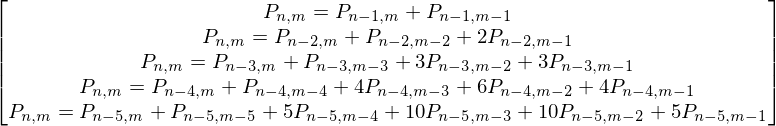

In [23]:
Matrix(5, 1, lambda i, j: unfoldings[i+1])

In [24]:
next_topic()

# what I'm working on

- *recursively defined structures*, both *inductively* and *co*-inductively, the _Haskell_ way...
- _matrices functions_, _companion matrices_ and _dynamic systems_
- `(Y Y)` works! you do know `Y`, didn't you? 
    - *quine generation* with microKanren, 
    - _disequality_ constraints support
- *reasong about Smullyan machines*, especially those that talk about themselves

In [25]:
try: 
    next_topic()
except StopIteration: 
    import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [26]:
greetings(smiley=True)

<h1>Thanks for coming  :)</h1>

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.